In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load audio files

In [3]:
aggressive_clip = "6761.wav"
ipd.Audio(aggressive_clip, rate = 22050)

In [4]:
sad_clip = "8725.wav"
ipd.Audio(sad_clip, rate = 22050)

In [5]:
happy_clip = "17861.wav"
ipd.Audio(happy_clip, rate = 22050)

In [6]:
romantic_clip = "5108.wav"
ipd.Audio(romantic_clip, rate = 22050)

In [7]:
dramatic_clip = "14374.wav"
ipd.Audio(dramatic_clip, rate = 22050)

In [8]:
aggressive, _ = librosa.load(aggressive_clip)
sad, _ = librosa.load(sad_clip)
happy, _ = librosa.load(happy_clip)
romantic, _ = librosa.load(romantic_clip)
dramatic, _ = librosa.load(dramatic_clip)

In [9]:
# extract RMSE using Librosa

FRAME_SIZE = 1024
HOP_LENGTH = 512

In [13]:
rms_aggressive = librosa.feature.rms(aggressive, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
rms_sad = librosa.feature.rms(sad, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
rms_happy = librosa.feature.rms(happy, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
rms_romantic = librosa.feature.rms(romantic, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
rms_dramatic = librosa.feature.rms(dramatic, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]

In [14]:
rms_aggressive.shape

(216,)

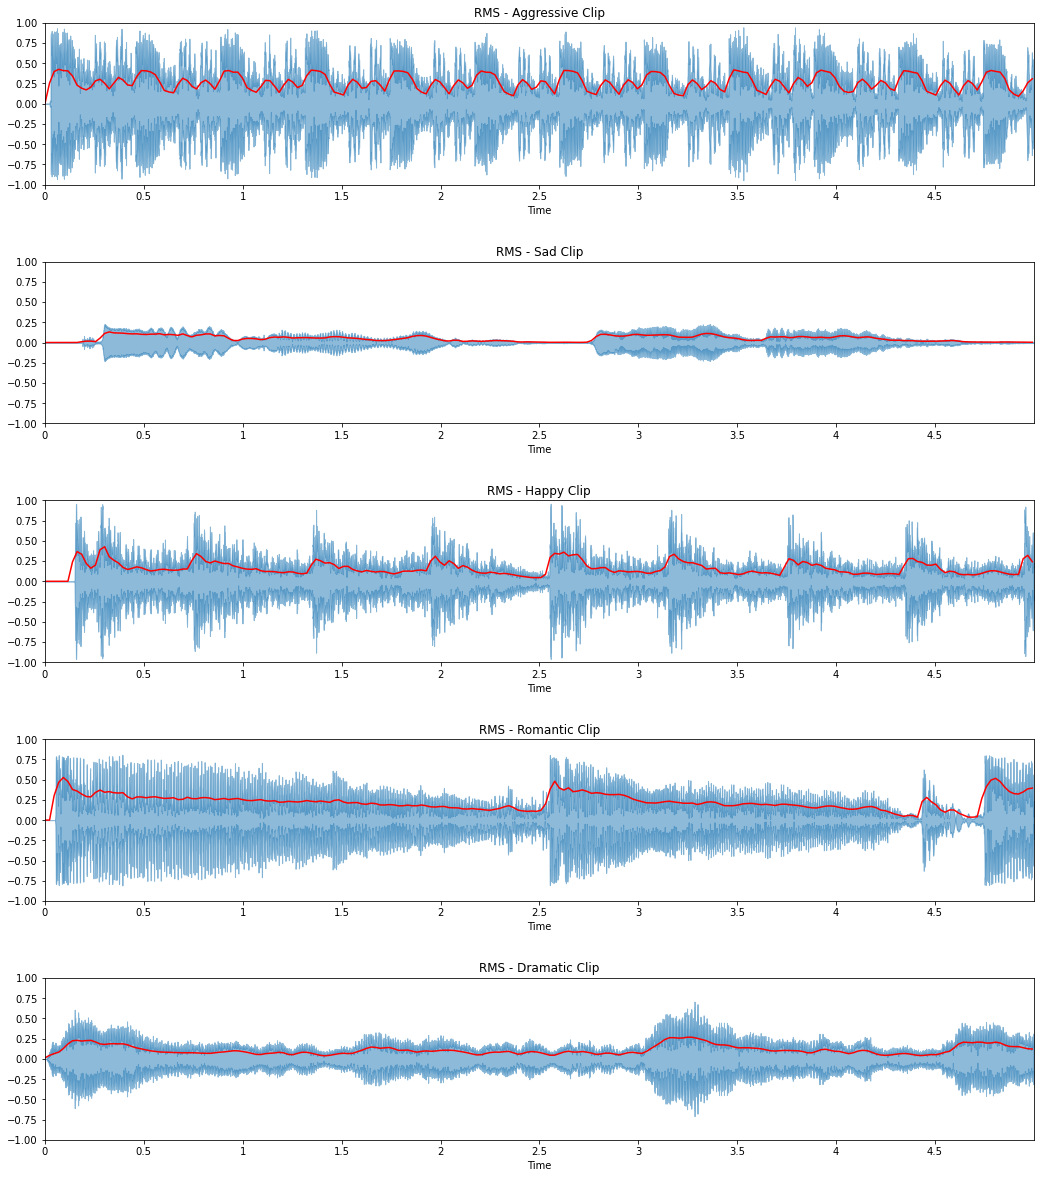

In [16]:
# visualize the rmse

# since the t is going to be the same for every emotion song piece, we calculate t just once

frames = range(0, rms_aggressive.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

figure = plt.figure(figsize=(15,17))

plt.subplot(5,1,1)
librosa.display.waveplot(aggressive, alpha = 0.5)
plt.plot(t, rms_aggressive, color = 'r')
plt.title('RMS - Aggressive Clip')
plt.ylim((-1,1))

plt.subplot(5,1,2)
librosa.display.waveplot(sad, alpha = 0.5)
plt.plot(t, rms_sad, color = 'r')
plt.title('RMS - Sad Clip')
plt.ylim((-1,1))

plt.subplot(5,1,3)
librosa.display.waveplot(happy, alpha = 0.5)
plt.plot(t, rms_happy, color = 'r')
plt.title('RMS - Happy Clip')
plt.ylim((-1,1))

plt.subplot(5,1,4)
librosa.display.waveplot(romantic, alpha = 0.5)
plt.plot(t, rms_romantic, color = 'r')
plt.title('RMS - Romantic Clip')
plt.ylim((-1,1))

plt.subplot(5,1,5)
librosa.display.waveplot(dramatic, alpha = 0.5)
plt.plot(t, rms_dramatic, color = 'r')
plt.title('RMS - Dramatic Clip')
plt.ylim((-1,1))

figure.tight_layout(pad=3.0)

plt.show()

In [18]:
# extract RMS energy from scratch
FRAME_SIZE = 1024
HOP_LENGTH = 512

def rms_energy(signal, frame_length, hop_length):
    rms_energy = []
    
    for i in range(0, len(signal), hop_length):
        rms_energy_current_frame = np.sqrt(np.sum(signal[i : i+frame_length]**2 / frame_length))
        rms_energy.append(rms_energy_current_frame)
        
    return np.array(rms_energy)

In [23]:
rms_aggressive_1 = rms_energy(aggressive, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)
rms_sad_1 = rms_energy(sad, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)
rms_happy_1 = rms_energy(happy, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)
rms_romantic_1 = rms_energy(romantic, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)
rms_dramatic_1 = rms_energy(dramatic, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)

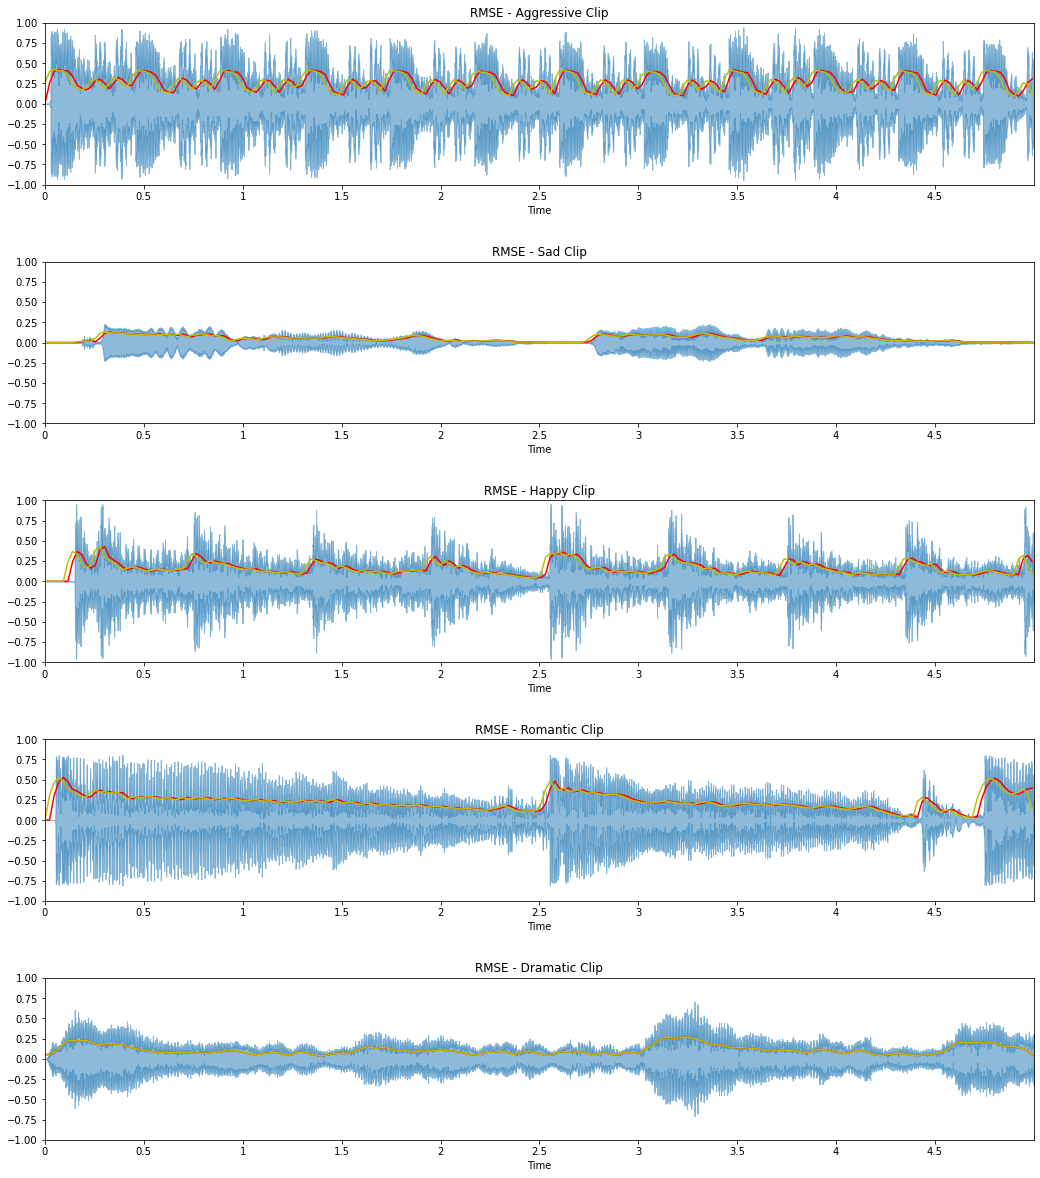

In [25]:
# visualize the rmse

# since the t is going to be the same for every emotion song piece, we calculate t just once

frames = range(0, rms_aggressive_1.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

figure = plt.figure(figsize=(15,17))

plt.subplot(5,1,1)
librosa.display.waveplot(aggressive, alpha = 0.5)
plt.plot(t, rms_aggressive, color = 'r')
plt.plot(t, rms_aggressive_1, color = 'y')
plt.title('RMSE - Aggressive Clip')
plt.ylim((-1,1))

plt.subplot(5,1,2)
librosa.display.waveplot(sad, alpha = 0.5)
plt.plot(t, rms_sad, color = 'r')
plt.plot(t, rms_sad_1, color = 'y')
plt.title('RMSE - Sad Clip')
plt.ylim((-1,1))

plt.subplot(5,1,3)
librosa.display.waveplot(happy, alpha = 0.5)
plt.plot(t, rms_happy, color = 'r')
plt.plot(t, rms_happy_1, color = 'y')
plt.title('RMSE - Happy Clip')
plt.ylim((-1,1))

plt.subplot(5,1,4)
librosa.display.waveplot(romantic, alpha = 0.5)
plt.plot(t, rms_romantic, color = 'r')
plt.plot(t, rms_romantic_1, color = 'y')
plt.title('RMSE - Romantic Clip')
plt.ylim((-1,1))

plt.subplot(5,1,5)
librosa.display.waveplot(dramatic, alpha = 0.5)
plt.plot(t, rms_dramatic_1, color = 'r')
plt.plot(t, rms_dramatic_1, color = 'y')
plt.title('RMSE - Dramatic Clip')
plt.ylim((-1,1))

figure.tight_layout(pad=3.0)

plt.show()

### ZERO Crossing Rate

In [28]:
zcr_aggressive = librosa.feature.zero_crossing_rate(aggressive, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
zcr_sad = librosa.feature.zero_crossing_rate(sad, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
zcr_happy = librosa.feature.zero_crossing_rate(happy, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
zcr_romantic = librosa.feature.zero_crossing_rate(romantic, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
zcr_dramatic = librosa.feature.zero_crossing_rate(dramatic, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]

In [29]:
zcr_aggressive.shape

(216,)

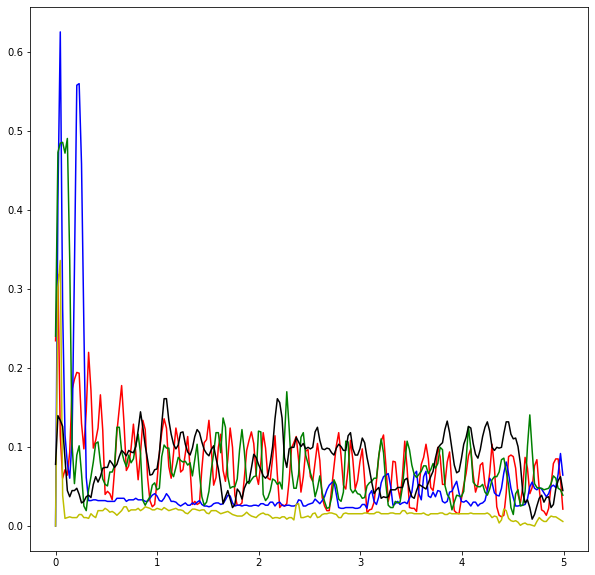

In [36]:
# visualize the zcr together

frames = range(0, zcr_aggressive.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

figure = plt.figure(figsize=(10,10))

plt.plot(t, zcr_aggressive, color = 'r')
plt.plot(t, zcr_sad, color = 'b')
plt.plot(t, zcr_happy, color = 'g')
plt.plot(t, zcr_romantic, color = 'y')
plt.plot(t, zcr_dramatic, color = 'k')

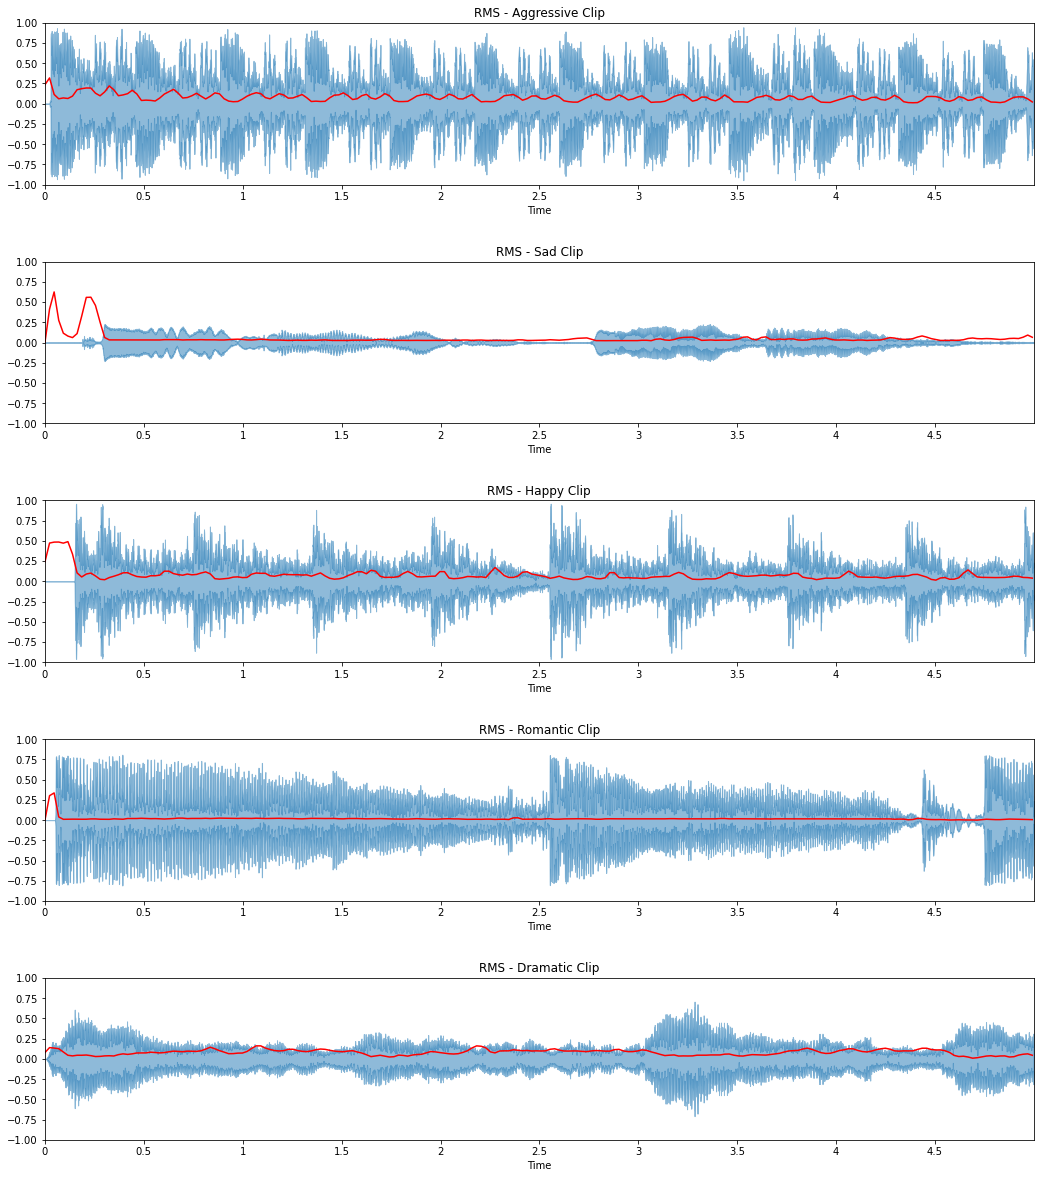

In [30]:
# visualize the zcr

# since the t is going to be the same for every emotion song piece, we calculate t just once

frames = range(0, zcr_aggressive.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

figure = plt.figure(figsize=(15,17))

plt.subplot(5,1,1)
librosa.display.waveplot(aggressive, alpha = 0.5)
plt.plot(t, zcr_aggressive, color = 'r')
plt.title('RMS - Aggressive Clip')
plt.ylim((-1,1))

plt.subplot(5,1,2)
librosa.display.waveplot(sad, alpha = 0.5)
plt.plot(t, zcr_sad, color = 'r')
plt.title('RMS - Sad Clip')
plt.ylim((-1,1))

plt.subplot(5,1,3)
librosa.display.waveplot(happy, alpha = 0.5)
plt.plot(t, zcr_happy, color = 'r')
plt.title('RMS - Happy Clip')
plt.ylim((-1,1))

plt.subplot(5,1,4)
librosa.display.waveplot(romantic, alpha = 0.5)
plt.plot(t, zcr_romantic, color = 'r')
plt.title('RMS - Romantic Clip')
plt.ylim((-1,1))

plt.subplot(5,1,5)
librosa.display.waveplot(dramatic, alpha = 0.5)
plt.plot(t, zcr_dramatic, color = 'r')
plt.title('RMS - Dramatic Clip')
plt.ylim((-1,1))

figure.tight_layout(pad=3.0)

plt.show()